In [384]:
!unzip /content/drive/MyDrive/Dataset.zip

Archive:  /content/drive/MyDrive/Dataset.zip
replace Dataset/A/015c05a7-3838-431a-82d8-9a55a8e0d1b4.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset/A/015c05a7-3838-431a-82d8-9a55a8e0d1b4.json  
  inflating: Dataset/A/06956017-b183-496a-a386-0f28135e20f7.json  
  inflating: Dataset/A/06d73969-0ddc-42c0-8816-394cedad5ae4.json  
  inflating: Dataset/A/0de32722-cb44-4323-8f49-133cb075eb87.json  
  inflating: Dataset/A/1397c973-1b08-483d-8e51-160d5c539cfb.json  
  inflating: Dataset/A/1b227ee4-3437-4000-bafb-a37a2a118671.json  
  inflating: Dataset/A/203d8815-2fdf-46e6-a0fe-9fafa70211fa.json  
  inflating: Dataset/A/31d57538-bd46-411e-a1c3-a03a9a27d819.json  
  inflating: Dataset/A/3e812346-1d60-41e2-aeb4-4f2b4059b1f6.json  
  inflating: Dataset/A/4f05f12d-1bc7-4e95-b889-7b6b1136704f.json  
  inflating: Dataset/A/51da8a52-a55c-47f4-b310-c221af1a78e1.json  
  inflating: Dataset/A/5781f301-4359-442c-a22d-504dc5cb4e97.json  
  inflating: Dataset/A/5bf9e4e4-c558-49d9-a82f-b4a

In [385]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

In [386]:
path = 'Dataset/'
letters = ['A','E','I','O','U']

In [387]:
letter_paths = os.path.join(path,letters[0])
letter_files = os.listdir(letter_paths)
letter_files

['1397c973-1b08-483d-8e51-160d5c539cfb.json',
 '0de32722-cb44-4323-8f49-133cb075eb87.json',
 'c0d673c5-bbaf-4ff6-9f76-f19e45413d94.json',
 'f8d3f86f-e379-4d53-a82b-1dd87343e11a.json',
 'd319d0cb-c9ec-4815-ace5-7ce23053fff3.json',
 'bede8eb7-4951-4dd9-8d7e-31edfda82bb4.json',
 '06d73969-0ddc-42c0-8816-394cedad5ae4.json',
 '6604b1d3-56a0-4128-a786-3712e829d9eb.json',
 '015c05a7-3838-431a-82d8-9a55a8e0d1b4.json',
 '8e4dea44-0abf-4e7b-b0a8-c93590777908.json',
 '73170b02-afc6-4f3a-9c9b-e60dd3259f21.json',
 '5f51c72f-d327-4c5f-bc09-55e0f9c7e3e8.json',
 '7bb58602-023d-4cca-854f-cf8a0969774f.json',
 'e0b8e00a-ccaa-482a-83ce-c3781c3a4fd3.json',
 'e60c5378-eb41-4d91-9cea-6c3708262207.json',
 'a75bda01-e42a-4592-9832-cf32ae1d7ae3.json',
 '51da8a52-a55c-47f4-b310-c221af1a78e1.json',
 '854e0728-800c-4763-8837-08acea4010d2.json',
 '5781f301-4359-442c-a22d-504dc5cb4e97.json',
 '5bf9e4e4-c558-49d9-a82f-b4adf65b93ec.json',
 '31d57538-bd46-411e-a1c3-a03a9a27d819.json',
 'ea5279f4-5118-4935-9450-a4298ae7

In [388]:
letter_content = open(os.path.join(letter_paths,letter_files[0]))
sign_data = json.load(letter_content)
letter_content.close()

In [389]:
sign_data.keys()

dict_keys(['timestamp', 'duration', 'emg', 'imu'])

In [390]:
type(sign_data['imu']['data'][0])

dict

In [391]:
sign_data['imu']['data'][0]['acceleration']
# sign_data['imu']['data'][0].keys()

[0.451171875, -0.46875, 0.7021484375]

In [392]:
pd.DataFrame(sign_data['emg']['data'])

,0,1,2,3,4,5,6,7
0,-1,0,-1,-1,-1,-2,-2,-1
1,-1,0,13,0,0,-2,-1,-2
2,-1,0,-2,-1,0,0,-2,-1
3,0,1,4,0,-1,0,0,1
4,-1,-2,2,1,0,0,-1,1
...,...,...,...,...,...,...,...,...
395,-2,-2,-7,3,0,0,0,-2
396,1,14,-1,-4,5,2,1,0
397,0,0,20,1,0,0,0,0
398,-1,-3,16,-2,1,0,-1,-2


In [393]:
pd.DataFrame(sign_data['imu']['data'])

,gyroscope,acceleration,orientation
0,"[-2.5, -0.1875, -1.25]","[0.451171875, -0.46875, 0.7021484375]","[-0.1038818359375, 0.34686279296875, -0.831848..."
1,"[-2.75, 0.6875, -0.625]","[0.44384765625, -0.45458984375, 0.7001953125]","[-0.10369873046875, 0.34710693359375, -0.83166..."
2,"[-3.0625, 1.25, 0.375]","[0.4384765625, -0.47314453125, 0.7060546875]","[-0.10321044921875, 0.34747314453125, -0.83154..."
3,"[-1.8125, 2.3125, -0.1875]","[0.43115234375, -0.4912109375, 0.7177734375]","[-0.10247802734375, 0.34759521484375, -0.83154..."
4,"[0.625, 3.125, -1.4375]","[0.42724609375, -0.4833984375, 0.72802734375]","[-0.1019287109375, 0.34710693359375, -0.831604..."
...,...,...,...
395,"[-14.5625, -33.875, -18.0]","[0.328125, -0.47314453125, 0.7880859375]","[-0.02679443359375, 0.3111572265625, -0.848876..."
396,"[-11.75, -26.25, -15.0]","[0.33056640625, -0.5126953125, 0.79833984375]","[-0.03497314453125, 0.3192138671875, -0.844726..."
397,"[-11.75, -26.25, -15.0]","[0.33056640625, -0.5126953125, 0.79833984375]","[-0.03497314453125, 0.3192138671875, -0.844726..."
398,"[-9.25, -23.125, -15.0]","[0.3427734375, -0.498046875, 0.80126953125]","[-0.03857421875, 0.322021484375, -0.8430175781..."


In [394]:
def cargar_emg(emg_path):
    letter_content = open(emg_path)
    sign_data = json.load(letter_content)
    letter_content.close()

    imu_data = pd.DataFrame(sign_data['imu']['data'])
    g_xyz = pd.DataFrame(imu_data['gyroscope'].to_list(),columns=['gx','gy','gz'])
    a_xyz = pd.DataFrame(imu_data['acceleration'].to_list(),columns=['ax','ay','az'])
    emg_data = pd.DataFrame(sign_data['emg']['data'],columns=['e1','e2','e3','e4','e5','e6','e7','e8'])

    all_data = emg_data.join(g_xyz.join(a_xyz))

    fs = sign_data['emg']['frequency']

    return all_data, fs

In [395]:
all_data, fs = cargar_emg(os.path.join(letter_paths,letter_files[0]))
all_data

,e1,e2,e3,e4,e5,e6,e7,e8,gx,gy,gz,ax,ay,az
0,-1,0,-1,-1,-1,-2,-2,-1,-2.5000,-0.1875,-1.2500,0.451172,-0.468750,0.702148
1,-1,0,13,0,0,-2,-1,-2,-2.7500,0.6875,-0.6250,0.443848,-0.454590,0.700195
2,-1,0,-2,-1,0,0,-2,-1,-3.0625,1.2500,0.3750,0.438477,-0.473145,0.706055
3,0,1,4,0,-1,0,0,1,-1.8125,2.3125,-0.1875,0.431152,-0.491211,0.717773
4,-1,-2,2,1,0,0,-1,1,0.6250,3.1250,-1.4375,0.427246,-0.483398,0.728027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-2,-2,-7,3,0,0,0,-2,-14.5625,-33.8750,-18.0000,0.328125,-0.473145,0.788086
396,1,14,-1,-4,5,2,1,0,-11.7500,-26.2500,-15.0000,0.330566,-0.512695,0.798340
397,0,0,20,1,0,0,0,0,-11.7500,-26.2500,-15.0000,0.330566,-0.512695,0.798340
398,-1,-3,16,-2,1,0,-1,-2,-9.2500,-23.1250,-15.0000,0.342773,-0.498047,0.801270


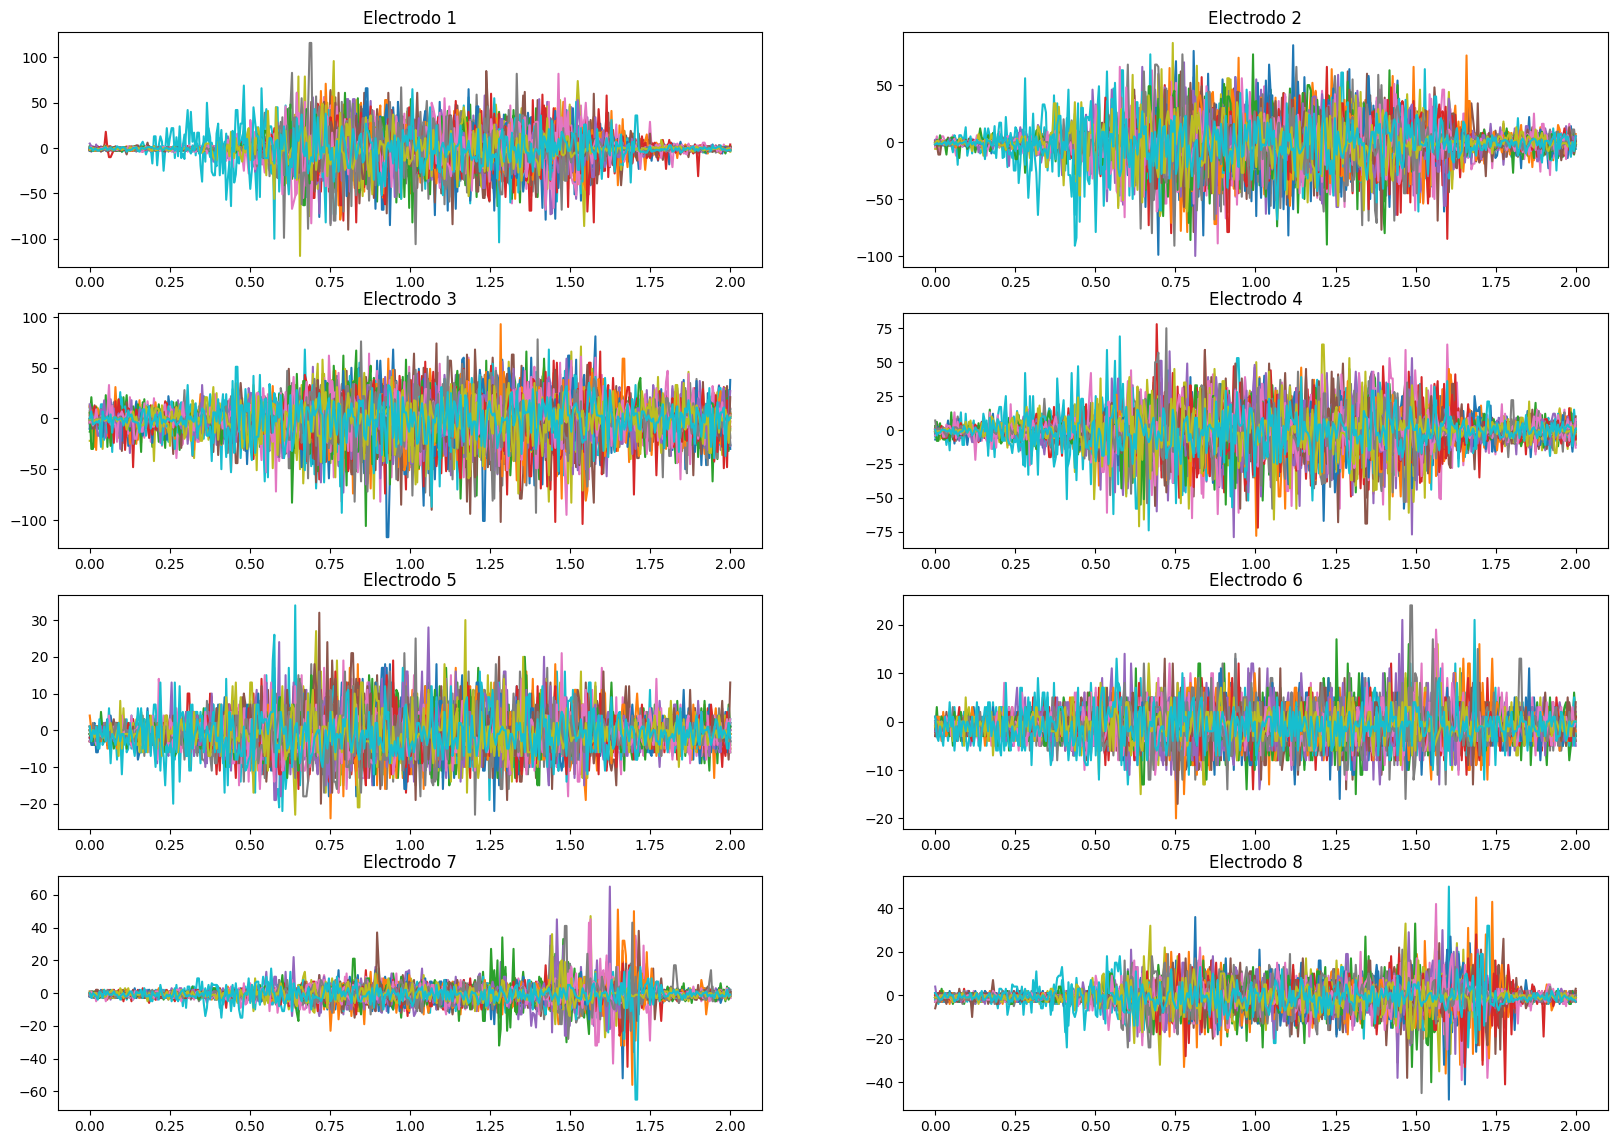

In [396]:
plt.figure(figsize=(20,14))

tiempo = np.linspace(0,len(all_data)/fs,len(all_data))

for letter_file in letter_files:

    all_data, fs = cargar_emg(os.path.join(letter_paths,letter_file))

    for n in range(8):
        plt.subplot(4,2,n+1)
        plt.plot(tiempo,all_data['e{}'.format(n+1)])
        plt.title('Electrodo {}'.format(n+1))

In [397]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

In [398]:
clf1 = Perceptron(penalty='elasticnet',alpha=1e-5, max_iter=10000)

Training score : 1.0
Testing score : 0.2


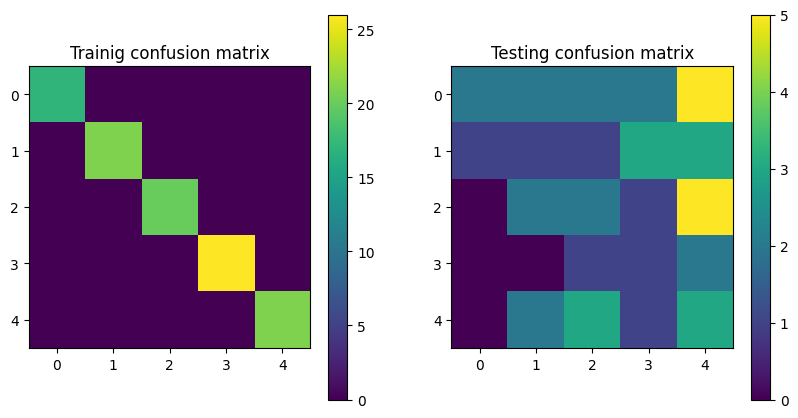

Training score : 1.0
Testing score : 0.2


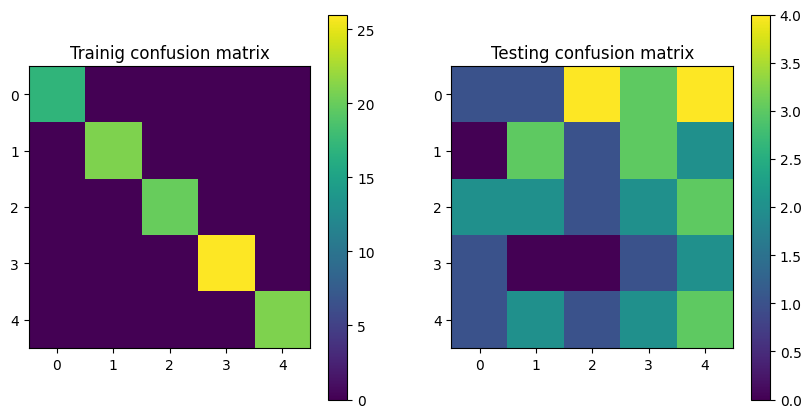

Training score : 1.0
Testing score : 0.15555555555555556


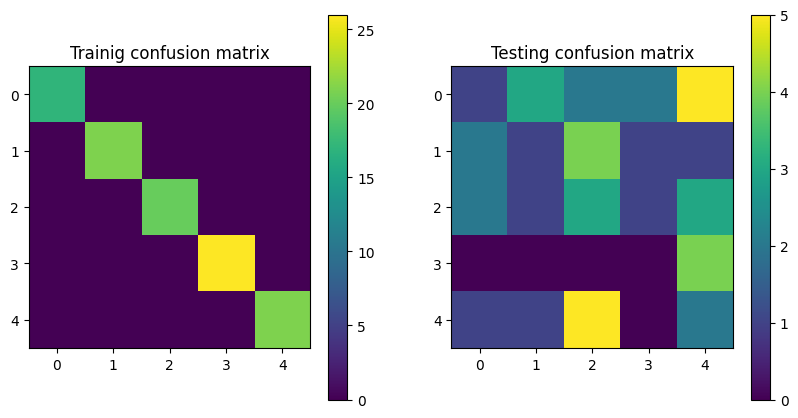

Training score : 1.0
Testing score : 0.2


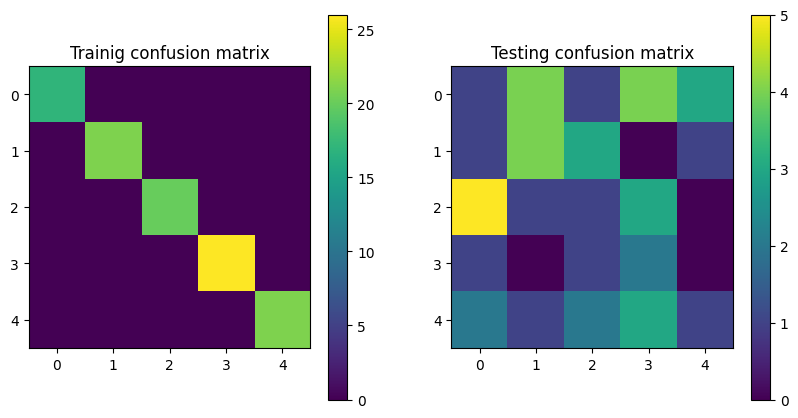

Training score : 1.0
Testing score : 0.2


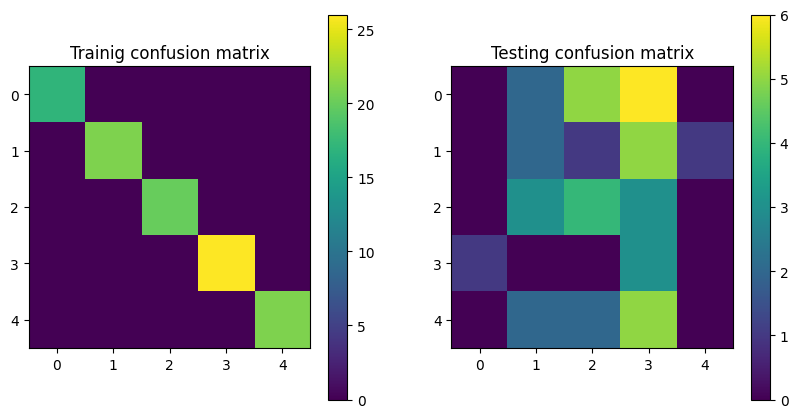

Training score : 1.0
Testing score : 0.37777777777777777


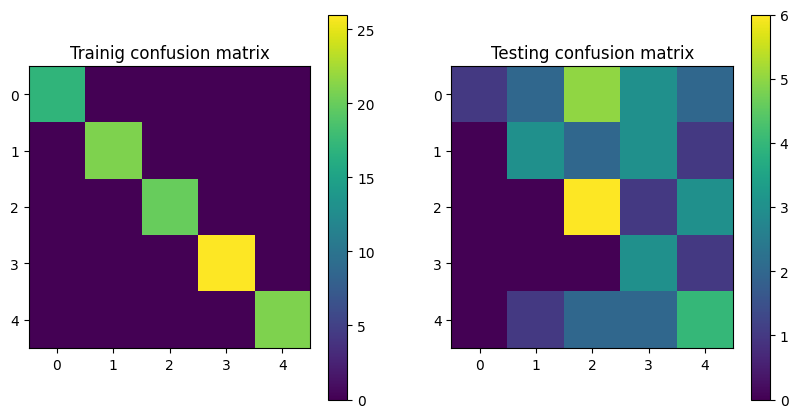

Training score : 1.0
Testing score : 0.24444444444444444


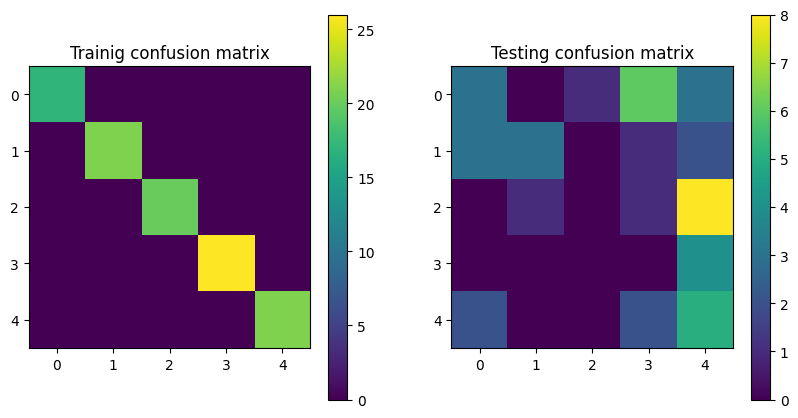

Training score : 1.0
Testing score : 0.28888888888888886


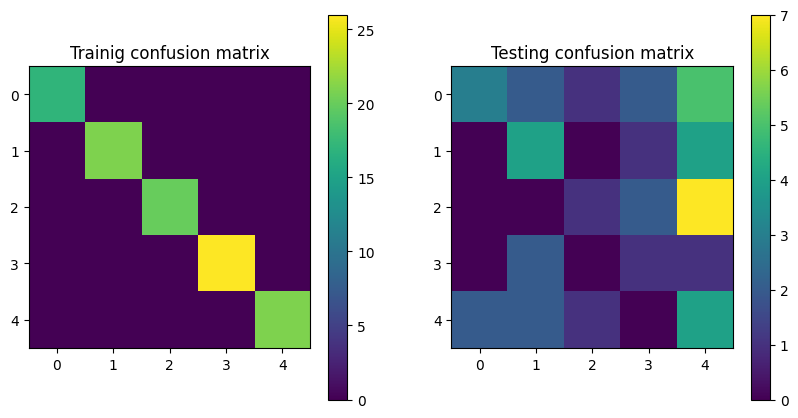

In [399]:
for n in range(8):

    letter_traces = []
    letter_catgry = []

    for letter in letters:

        letter_paths = os.path.join(path,letter)
        letter_files = os.listdir(letter_paths)

        for letter_file in letter_files:

            all_data, fs = cargar_emg(os.path.join(letter_paths,letter_file))

            emg_signal = all_data['e{}'.format(n+1)]
            letter_traces.append(emg_signal)
            letter_catgry.append(letter)


    X_data = np.array(letter_traces)
    Y_data = np.array(letter_catgry)

    plt.figure(figsize=(10,5))

    X_train, X_test, y_train, y_test = train_test_split(normalize(X_data), Y_data,
                                                        test_size=0.3, random_state=42)

    clf1.fit(X_train,y_train)
    print('Training score : {}'.format(clf1.score(X_train,y_train)))

    y_predict = clf1.predict(X_train)
    conf_mat = confusion_matrix(y_train,y_predict)

    plt.subplot(1,2,1)
    plt.imshow(conf_mat)
    plt.colorbar()
    plt.title('Trainig confusion matrix')

    print('Testing score : {}'.format(clf1.score(X_test,y_test)))

    y_predict = clf1.predict(X_test)
    conf_mat = confusion_matrix(y_test,y_predict)

    plt.subplot(1,2,2)
    plt.imshow(conf_mat)
    plt.title('Testing confusion matrix')
    plt.colorbar()


    plt.show()

Training score : 1.0
Testing score : 0.24444444444444444


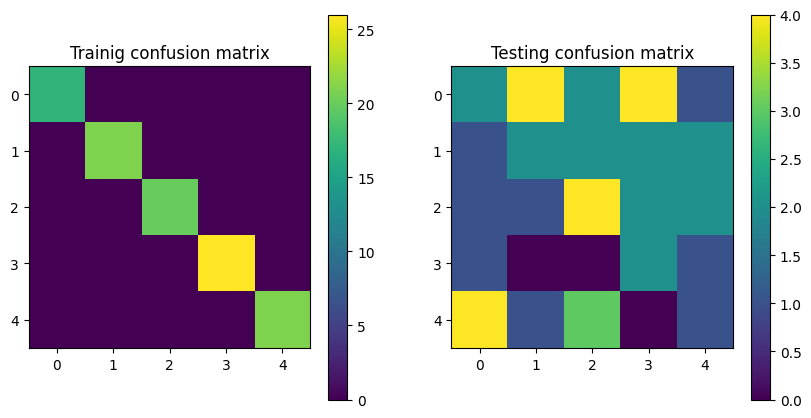

In [400]:
letter_traces = []
letter_catgry = []

for letter in letters:

    letter_paths = os.path.join(path,letter)
    letter_files = os.listdir(letter_paths)

    for letter_file in letter_files:

        all_data, fs = cargar_emg(os.path.join(letter_paths,letter_file))

        emg_signal = list(all_data['e1'])

        for n in range(1,8):
            emg_signal += list(all_data['e{}'.format(n+1)])
        letter_traces.append(emg_signal)
        letter_catgry.append(letter)


X_data = np.array(letter_traces)
Y_data = np.array(letter_catgry)

X_train, X_test, y_train, y_test = train_test_split(normalize(X_data), Y_data,
                                                    test_size=0.3, random_state=42)

plt.figure(figsize=(10,5))

clf1.fit(X_train,y_train)
print('Training score : {}'.format(clf1.score(X_train,y_train)))

y_predict = clf1.predict(X_train)
conf_mat = confusion_matrix(y_train,y_predict)

plt.subplot(1,2,1)
plt.imshow(conf_mat)
plt.colorbar()
plt.title('Trainig confusion matrix')

print('Testing score : {}'.format(clf1.score(X_test,y_test)))

y_predict = clf1.predict(X_test)
conf_mat = confusion_matrix(y_test,y_predict)

plt.subplot(1,2,2)
plt.imshow(conf_mat)
plt.title('Testing confusion matrix')
plt.colorbar()


plt.show()

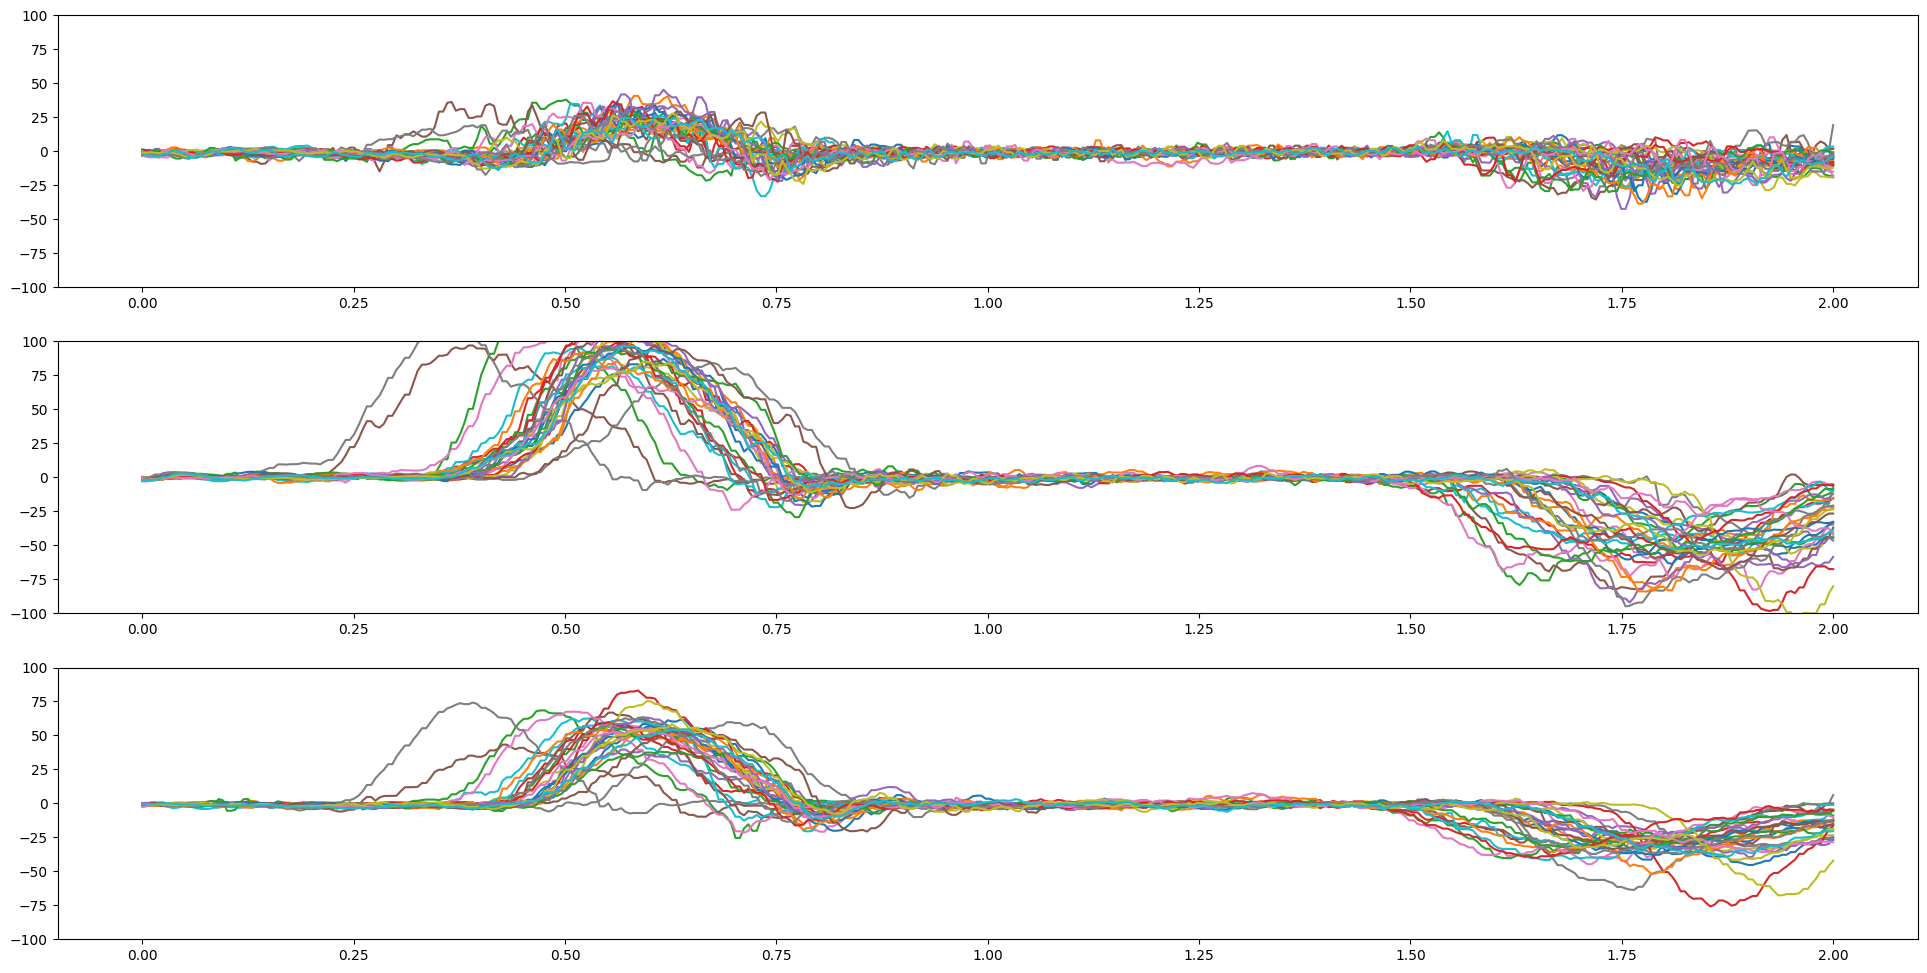

In [401]:
plt.figure(figsize=(24,12))

for letter_file in letter_files:

    all_data,fs = cargar_emg(os.path.join(letter_paths,letter_file))

    plt.subplot(3,1,1); plt.plot(tiempo, all_data['gx']); plt.ylim(-100,100)
    plt.subplot(3,1,2); plt.plot(tiempo, all_data['gy']); plt.ylim(-100,100)
    plt.subplot(3,1,3); plt.plot(tiempo, all_data['gz']); plt.ylim(-100,100)

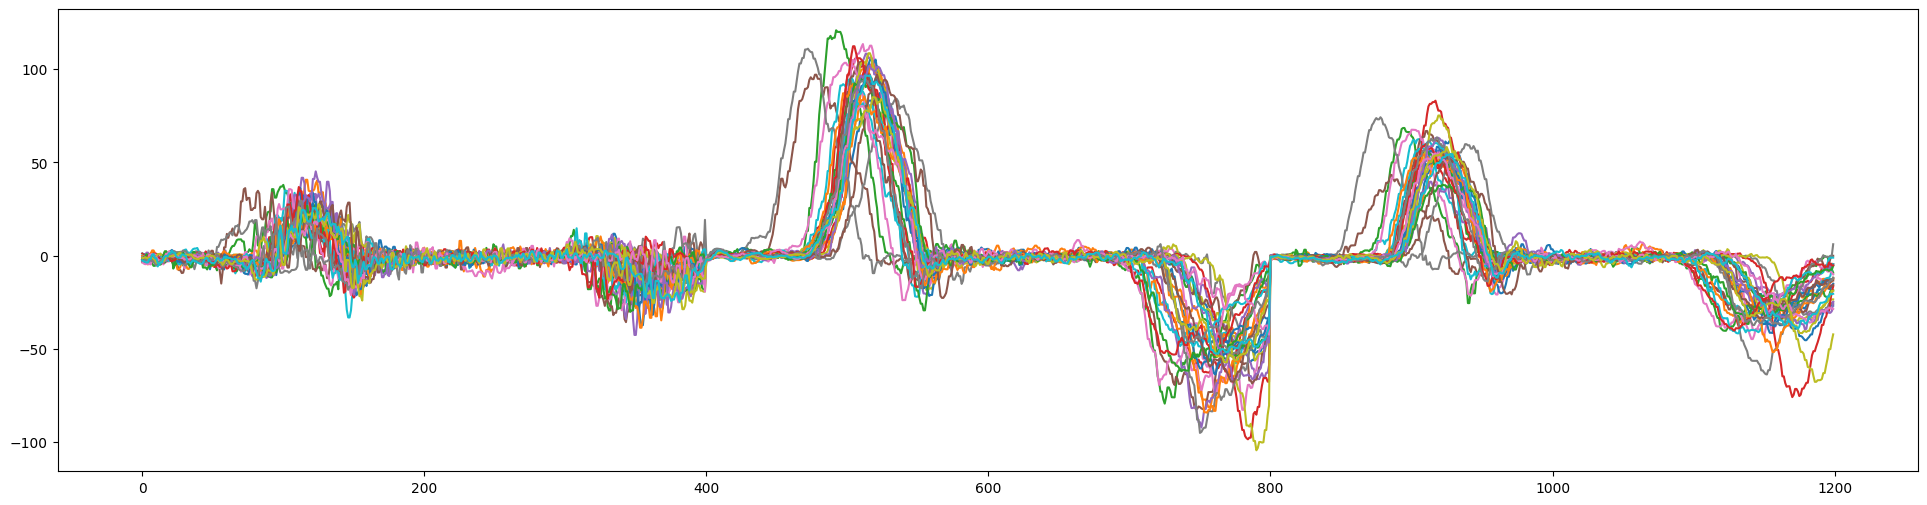

In [402]:
plt.figure(figsize=(24,6))

for letter_file in letter_files:

    all_data,fs = cargar_emg(os.path.join(letter_paths,letter_file))

    traces = pd.concat([all_data['gx'],all_data['gy'],all_data['gz']])
    traces.index = range(len(traces))

    plt.plot(traces)

(150, 1200)
(150,)
Training score : 0.9523809523809523
Testing score : 0.6666666666666666


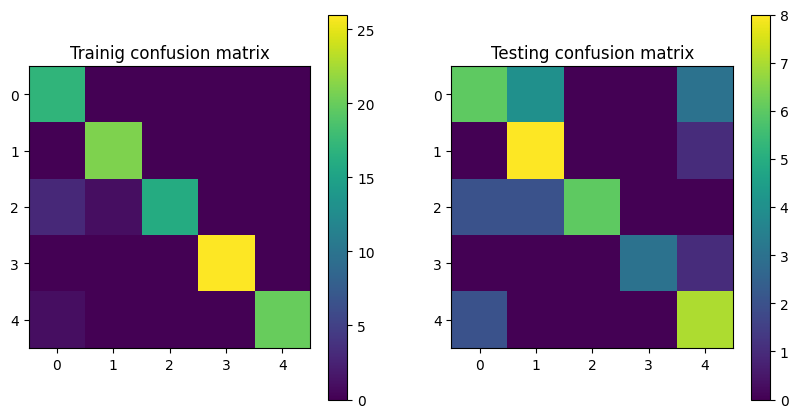

In [403]:
letter_traces = []
letter_catgry = []

for letter in letters:

    letter_paths = os.path.join(path,letter)
    letter_files = os.listdir(letter_paths)

    for letter_file in letter_files:

        all_data,fs = cargar_emg(os.path.join(letter_paths,letter_file))

        traces = pd.concat([all_data['gx'],all_data['gy'],all_data['gz']])
        traces.index = range(len(traces))

        letter_traces.append(traces)
        letter_catgry.append(letter)

X_data = np.array(letter_traces)
print(X_data.shape)

Y_data = np.array(letter_catgry)
print(Y_data.shape)

plt.figure(figsize=(10,5))

X_train, X_test, y_train, y_test = train_test_split((X_data), Y_data,
                                                    test_size=0.3, random_state=42)

clf1.fit(X_train,y_train)
print('Training score : {}'.format(clf1.score(X_train,y_train)))

y_predict = clf1.predict(X_train)
conf_mat = confusion_matrix(y_train,y_predict)

plt.subplot(1,2,1)
plt.imshow(conf_mat)
plt.colorbar()
plt.title('Trainig confusion matrix')

print('Testing score : {}'.format(clf1.score(X_test,y_test)))

y_predict = clf1.predict(X_test)
conf_mat = confusion_matrix(y_test,y_predict)

plt.subplot(1,2,2)
plt.imshow(conf_mat)
plt.title('Testing confusion matrix')
plt.colorbar()

plt.show()

X_data:  (150, 1200)
Y_data:  (150,)
Training score : 0.5523809523809524
Testing score : 0.4888888888888889


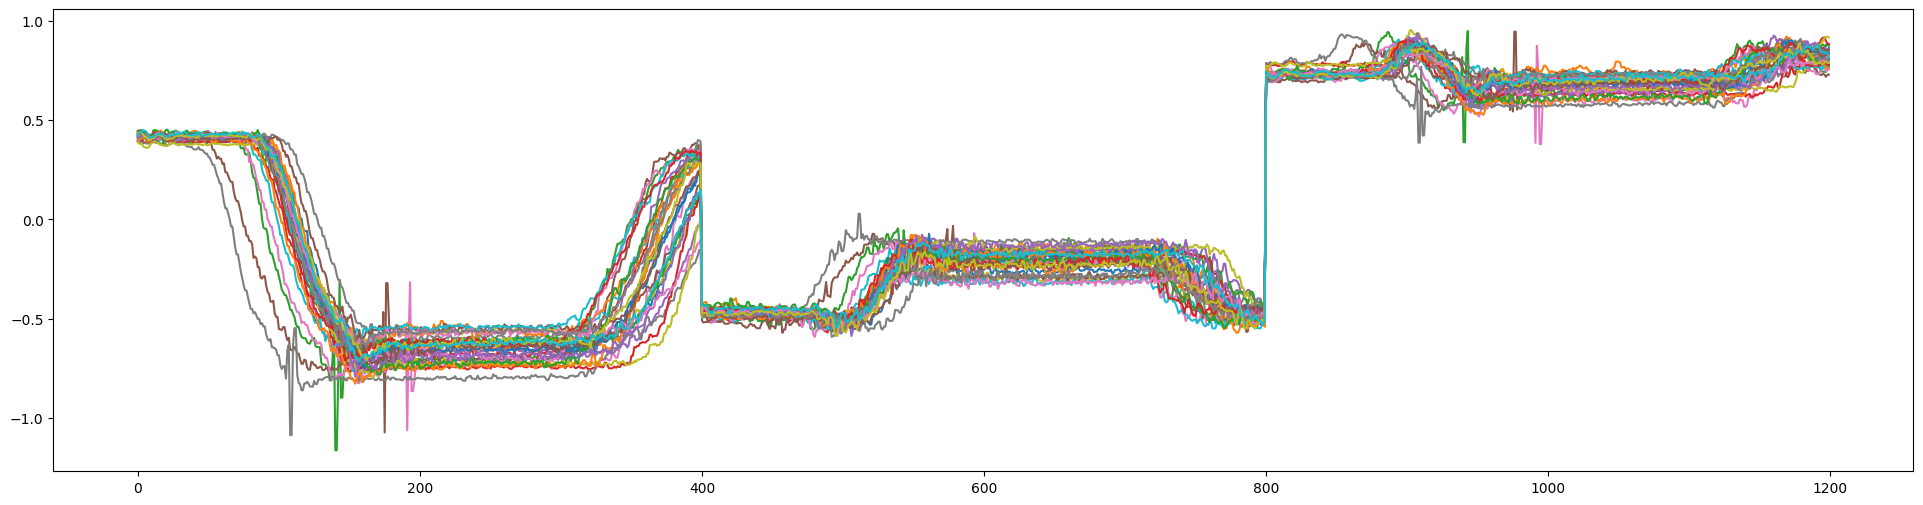

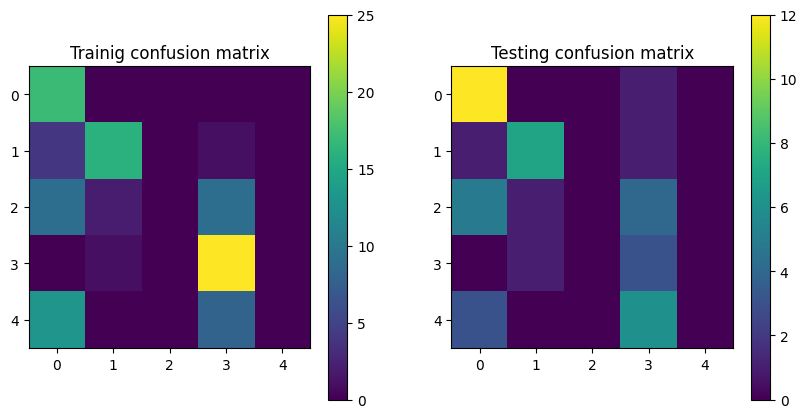

In [404]:
plt.figure(figsize=(24,6))

for letter_file in letter_files:

    all_data,fs = cargar_emg(os.path.join(letter_paths,letter_file))

    traces = pd.concat([all_data['ax'],all_data['ay'],all_data['az']])
    traces.index = range(len(traces))

    plt.plot(traces)

letter_traces = []
letter_catgry = []

for letter in letters:

    letter_paths = os.path.join(path,letter)
    letter_files = os.listdir(letter_paths)

    for letter_file in letter_files:

        all_data,fs = cargar_emg(os.path.join(letter_paths,letter_file))

        traces = pd.concat([all_data['ax'],all_data['ay'],all_data['az']])
        traces.index = range(len(traces))

        letter_traces.append(traces)
        letter_catgry.append(letter)


X_data = np.array(letter_traces)
print('X_data: ',X_data.shape)

Y_data = np.array(letter_catgry)
print('Y_data: ',Y_data.shape)


plt.figure(figsize=(10,5))

X_train, X_test, y_train, y_test = train_test_split((X_data), Y_data,
                                                    test_size=0.3, random_state=42)

clf1.fit(X_train,y_train)
print('Training score : {}'.format(clf1.score(X_train,y_train)))

y_predict = clf1.predict(X_train)
conf_mat = confusion_matrix(y_train,y_predict)

plt.subplot(1,2,1)
plt.imshow(conf_mat)
plt.colorbar()
plt.title('Trainig confusion matrix')

print('Testing score : {}'.format(clf1.score(X_test,y_test)))

y_predict = clf1.predict(X_test)
conf_mat = confusion_matrix(y_test,y_predict)

plt.subplot(1,2,2)
plt.imshow(conf_mat)
plt.title('Testing confusion matrix')
plt.colorbar()

plt.show()

X_data:  (150, 2400)
Y_data:  (150,)
Training score : 0.9428571428571428
Testing score : 0.6


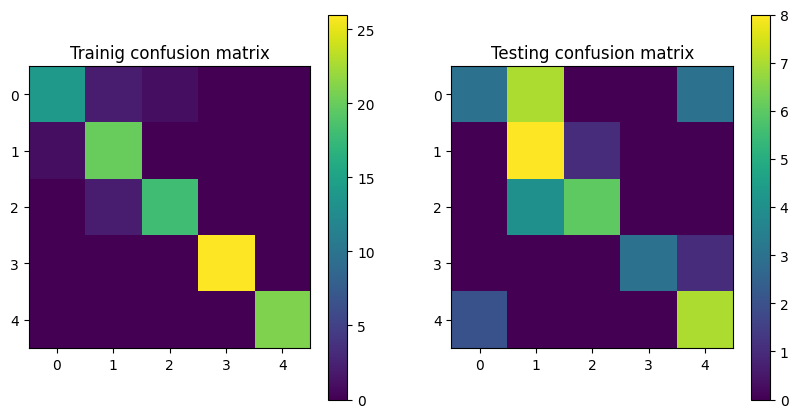

In [405]:
letter_traces = []
letter_catgry = []

for letter in letters:

    letter_paths = os.path.join(path,letter)
    letter_files = os.listdir(letter_paths)

    for letter_file in letter_files:

        all_data,fs = cargar_emg(os.path.join(letter_paths,letter_file))

        traces = pd.concat([all_data['gx'],all_data['gy'],all_data['gz'],all_data['ax'],all_data['ay'],all_data['az']])
        traces.index = range(len(traces))

        letter_traces.append(traces)
        letter_catgry.append(letter)


X_data = np.array(letter_traces)
print('X_data: ',X_data.shape)

Y_data = np.array(letter_catgry)
print('Y_data: ',Y_data.shape)


plt.figure(figsize=(10,5))

X_train, X_test, y_train, y_test = train_test_split((X_data), Y_data,
                                                    test_size=0.3, random_state=42)

clf1.fit(X_train,y_train)
print('Training score : {}'.format(clf1.score(X_train,y_train)))

y_predict = clf1.predict(X_train)
conf_mat = confusion_matrix(y_train,y_predict)

plt.subplot(1,2,1)
plt.imshow(conf_mat)
plt.colorbar()
plt.title('Trainig confusion matrix')

print('Testing score : {}'.format(clf1.score(X_test,y_test)))

y_predict = clf1.predict(X_test)
conf_mat = confusion_matrix(y_test,y_predict)

plt.subplot(1,2,2)
plt.imshow(conf_mat)
plt.title('Testing confusion matrix')
plt.colorbar()

plt.show()

X_data:  (150, 5600)
Y_data:  (150,)
Training score : 1.0
Testing score : 0.5111111111111111


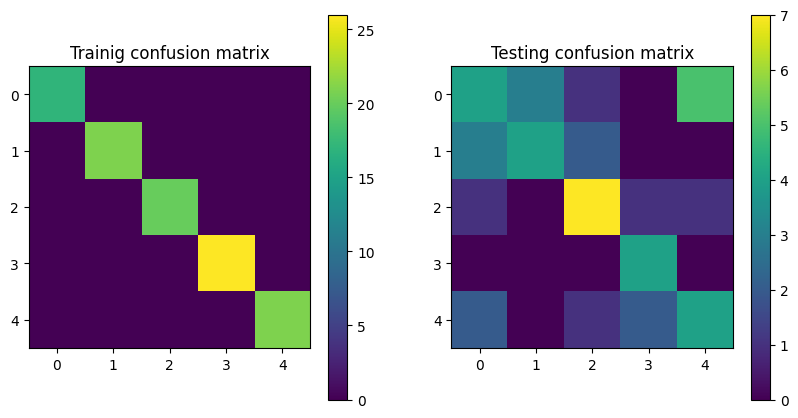

In [406]:
letter_traces = []
letter_catgry = []

for letter in letters:

    letter_paths = os.path.join(path,letter)
    letter_files = os.listdir(letter_paths)

    for letter_file in letter_files:

        all_data,fs = cargar_emg(os.path.join(letter_paths,letter_file))

        traces = pd.concat([all_data[col] for col in all_data.columns])
        traces.index = range(len(traces))

        letter_traces.append(traces)
        letter_catgry.append(letter)


X_data = np.array(letter_traces)
print('X_data: ',X_data.shape)

Y_data = np.array(letter_catgry)
print('Y_data: ',Y_data.shape)


plt.figure(figsize=(10,5))

X_train, X_test, y_train, y_test = train_test_split(normalize(X_data), Y_data,
                                                    test_size=0.3, random_state=42)

clf1.fit(X_train,y_train)
print('Training score : {}'.format(clf1.score(X_train,y_train)))

y_predict = clf1.predict(X_train)
conf_mat = confusion_matrix(y_train,y_predict)

plt.subplot(1,2,1)
plt.imshow(conf_mat)
plt.colorbar()
plt.title('Trainig confusion matrix')

print('Testing score : {}'.format(clf1.score(X_test,y_test)))

y_predict = clf1.predict(X_test)
conf_mat = confusion_matrix(y_test,y_predict)

plt.subplot(1,2,2)
plt.imshow(conf_mat)
plt.title('Testing confusion matrix')
plt.colorbar()

plt.show()

#TAREA

En este código se usa Random Forest Classifier el cuál es un algoritmo de aprendizaje supervisado utilizado para tareas de clasificación. Pertenece a la categoría de métodos de ensamble, que combina múltiples árboles de decisión individuales para obtener una predicción más precisa y robusta.

Random Forest se compone de múltiples árboles de decisión. Cada árbol se entrena de manera independiente utilizando diferentes subconjuntos aleatorios del conjunto de datos de entrenamiento.
Bootstrap Aggregating (Bagging):

El algoritmo utiliza un enfoque llamado bagging, donde se crea cada árbol en el bosque utilizando una técnica de muestreo aleatorio con reemplazo del conjunto de datos de entrenamiento. Esto significa que cada árbol se entrena con un conjunto de datos ligeramente diferente.
Random Feature Selection:

Durante la construcción de cada árbol de decisión, en cada división de nodo, solo se considera un subconjunto aleatorio de características (variables) para determinar la mejor división. Esto ayuda a aumentar la diversidad entre los árboles y reducir la correlación entre ellos.
Votación o Promedio:

Una vez que se han construido todos los árboles, cuando se realiza una predicción para una nueva instancia, cada árbol en el bosque emite una predicción. En la clasificación, la predicción final es determinada por votación entre los árboles (clasificación por mayoría). En la regresión, se puede tomar el promedio de las predicciones individuales de cada árbol.
Robustez y Generalización:

Debido a la combinación de múltiples árboles entrenados de manera diversa, Random Forest tiende a ser más resistente al sobreajuste que un solo árbol de decisión. Además, tiende a generalizar bien a datos nuevos y no vistos.
El algoritmo de Random Forest es muy popular en aplicaciones prácticas debido a su capacidad para manejar conjuntos de datos grandes, lidiar con múltiples características, y ser robusto y eficiente. Es útil tanto para clasificación como para regresión, y es conocido por su buen rendimiento en una variedad de problemas de aprendizaje automático.

In [431]:
# Define la función para cargar datos de EMG y predecir la letra.
def predict_letter(emg_path, trained_model):
    all_data, _ = cargar_emg(emg_path)  # Cargue datos EMG desde la ruta indicada
    normalized_data = normalize(all_data.values.flatten().reshape(1, -1))  # Normalizar y aplanar datos para la predicción
    letter_prediction = trained_model.predict(normalized_data)  # Predecir usando el modelo entrenado
    return letter_prediction[0]  # Devuelve la letra predicha

In [432]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
# Inicializar y entrenar el clasificador Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_data_all_normalized, Y_data_all)

RandomForestClassifier(random_state=42)

In [433]:
# Función para predecir la letra usando Random Forest Classifier
def predict_letter_rf(emg_path, trained_model):
    all_data, _ = cargar_emg(emg_path)
    normalized_data = normalize(all_data.values.flatten().reshape(1, -1))
    letter_prediction = trained_model.predict(normalized_data)
    return letter_prediction[0]

#Letra A

In [436]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/A/06956017-b183-496a-a386-0f28135e20f7.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: A


In [437]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/A/31d57538-bd46-411e-a1c3-a03a9a27d819.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: A


#Letra E

In [438]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/E/1726897c-3593-4df5-8f80-2cc82b1515fc.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: E


In [439]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/E/59975132-63e6-4439-ab5d-f488f0095c33.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: E


#Letra I

In [440]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/I/1d949c62-cf1f-426f-9116-89c710dc2d79.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: I


In [441]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/I/8b883177-b429-4949-8f2e-a5dca06d751b.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: I


#Letra O

In [442]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/O/58b2ffd4-7497-4376-8272-704b0351c7b3.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: O


In [443]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/O/69221f40-b71a-46e2-b0a5-b2e52954282d.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: O


Letra U

In [444]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/U/51d02e33-bf6f-4efc-aab3-73556a716c00.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: U


In [445]:
# Ruta al archivo EMG para predicción
path_to_emg_file = '/content/Dataset/U/a4e73be3-ed46-431f-a4d8-733ff641248f.json'

# Obtener la letra predicha usando Random Forest Classifier
predicted_letter_rf = predict_letter_rf(path_to_emg_file, clf_rf)
print(f"La letra es: {predicted_letter_rf}")

La letra es: U
